In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [3]:
properti = pd.read_csv('Dataset_UTS_Gasal_2425.csv')
properti.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,9892300.1,Luxury
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,8321631.1,Luxury
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,7122699.1,Luxury
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,9086177.3,Luxury


In [4]:
properti2 = properti.drop('price', axis=1)
properti2.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,Luxury
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,Luxury
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,Luxury
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,Luxury


In [5]:
print("data null \n", properti2.isnull().sum())
print("data kosong \n", properti2.empty)
print("data nan \n", properti2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [6]:
print("Sebelum drop missing value", properti2.shape)
properti2 = properti2.dropna(how="any", inplace=False)
print("Setelah drop missing value", properti2.shape)

Sebelum drop missing value (10000, 17)
Setelah drop missing value (10000, 17)


In [7]:
print("Sebelum Pengecekan data duplikat", properti2.shape)
properti3 = properti2.drop_duplicates(keep='last')
print("Setelah Pengecekan data duplikat", properti3.shape)

Sebelum Pengecekan data duplikat (10000, 17)
Setelah Pengecekan data duplikat (10000, 17)


In [8]:
kolom_kategori=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']
transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori),
    remainder = 'passthrough'
)

In [9]:
x=properti3.drop('category',axis=1)
y=properti3.category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=84)

print(x_train.shape)
print(x_test.shape)

(8000, 16)
(2000, 16)


In [10]:
x_train_enc = transform.fit_transform(x_train)
x_test_enc = transform.fit_transform(x_test)

df_train_enc = pd.DataFrame (x_train_enc, columns=transform.get_feature_names_out())
df_test_enc = pd.DataFrame (x_test_enc, columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,97.0,45.0,62899.0,1.0,9.0,1990.0,4110.0,1675.0,599.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,76.0,54.0,82737.0,7.0,3.0,1998.0,4010.0,8343.0,260.0,10.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,72.0,26.0,7812.0,6.0,3.0,1995.0,6972.0,3804.0,828.0,8.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,46.0,51.0,91317.0,5.0,3.0,2020.0,3337.0,7250.0,337.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4.0,30.0,8424.0,4.0,10.0,2003.0,5655.0,1684.0,453.0,8.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,47.0,14.0,50927.0,9.0,6.0,1993.0,4078.0,315.0,767.0,10.0
6,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,54.0,15.0,61691.0,2.0,2.0,2002.0,5925.0,9705.0,342.0,8.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,42.0,50.0,50833.0,3.0,8.0,2009.0,9320.0,5752.0,936.0,3.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,97.0,3.0,68804.0,10.0,5.0,1991.0,5804.0,2070.0,846.0,9.0
9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,18.0,26.0,67302.0,6.0,2.0,2005.0,6111.0,771.0,500.0,10.0


In [23]:
#import Library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

#buat rancangan pipeline mulai dari data scaling hingga classifier
pipe_RF = [
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', RandomForestClassifier(random_state=84, class_weight='balanced'))
]

#buat parameter grid untuk step feature selection dan classifier
params_grid_RF = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__max_depth': np.arange(4, 6),  # Ubah dari 4-5 menjadi 4-6
        'clf__n_estimators': [50, 100]  # Ubah dari 100, 150 menjadi 50, 100
    },
    
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__max_depth': np.arange(4, 6),  # Ubah dari 4-5 menjadi 4-6
        'clf__n_estimators': [50, 100]  # Ubah dari 100, 150 menjadi 50, 100
    },
]

#muat tancangan pipeline ke dalam objek pipeline
estimator_RF = Pipeline(pipe_RF)

#muat pipeline dan parameter grid ke dalam objek GSCV dengan Stratified 5-fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=84)  # RANDOM STATE MENGGUNAKAN 2 atau 1 DIGIT
GSCV_RF = GridSearchCV(estimator_RF, params_grid_RF, cv=SKF)

#jalankan objek GSCV untuk melatih model dengan train set menggunakan fungsi fit
GSCV_RF.fit(x_train_enc, y_train)
print("GSCV training finished")


GSCV training finished


CV Score: 0.937875
Test Score: 0.933
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=4)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=50, random_state=84))])
Best features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'remainder__squaremeters'],
      dtype='object')


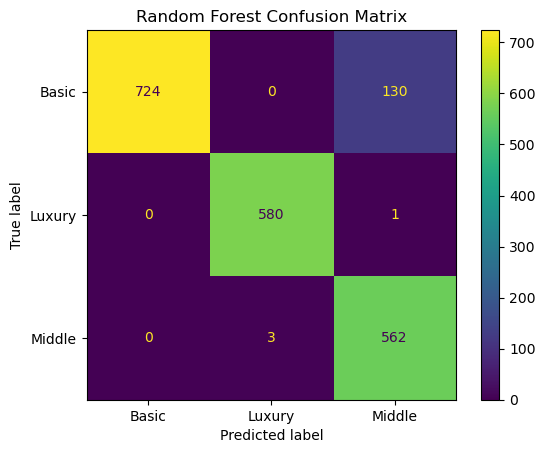

Classification report RF: 
               precision    recall  f1-score   support

       Basic       1.00      0.85      0.92       854
      Luxury       0.99      1.00      1.00       581
      Middle       0.81      0.99      0.89       565

    accuracy                           0.93      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.95      0.93      0.93      2000



In [25]:
#tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_RF.best_score_))
#tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_RF.best_estimator_.score(x_test_enc, y_test)))
#tampilkan best model dan best features
print("Best model:", GSCV_RF.best_estimator_)

mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()
print("Best features:", df_train_enc.columns[mask])

#buat prediksi dari test set
RF_pred = GSCV_RF.predict(x_test_enc)

import matplotlib.pyplot as plt
#buat confusion matrix
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)
#buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()

plt. title("Random Forest Confusion Matrix")
plt.show()
#tampilkan Classification report
print("Classification report RF: \n", classification_report(y_test, RF_pred))


In [16]:
#import Library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Buat rancangan pipeline mulai dari data scaling hingga classifier
pipe_RF_percentil = [('data_scaling', StandardScaler()),
                     ('feature_select', SelectPercentile()),
                     ('clf', RandomForestClassifier(random_state=84, class_weight='balanced'))]

# Buat parameter grid untuk step feature selection dan classifier
params_grid_RF_percentil = [{
                    'data_scaling': [StandardScaler()],
                    'feature_select': [SelectPercentile()],
                    'feature_select__percentile': np.arange(30, 51),
                    'clf__max_depth': np.arange(4, 6),
                    'clf__n_estimators': [50, 100, 150, 200]
                    },
                {
                'data_scaling': [MinMaxScaler()],
                'feature_select': [SelectPercentile()],
                'feature_select__percentile': np.arange(30, 51),
                'clf__max_depth': np.arange(4, 6),
                'clf__n_estimators': [50, 100, 150, 200]
                }]

# Definisikan StratifiedKFold
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=84)

# Muat tancangan pipeline ke dalam objek pipeline
estimator_RF = Pipeline(pipe_RF_percentil)

# Muat pipeline dan parameter grid ke dalam objek GSCV dengan Stratified 5-fold CV
GSCV_RF = GridSearchCV(estimator_RF, params_grid_RF_percentil, cv=SKF)

# Jalankan objek GSCV untuk melatih model dengan train set menggunakan fungsi fit
GSCV_RF.fit(x_train_enc, y_train)
print("GSCV training finished")


GSCV training finished


CV Score: 0.937875
Test Score: 0.933
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=4)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=50, random_state=84))])
Best features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'remainder__squaremeters'],
      dtype='object')


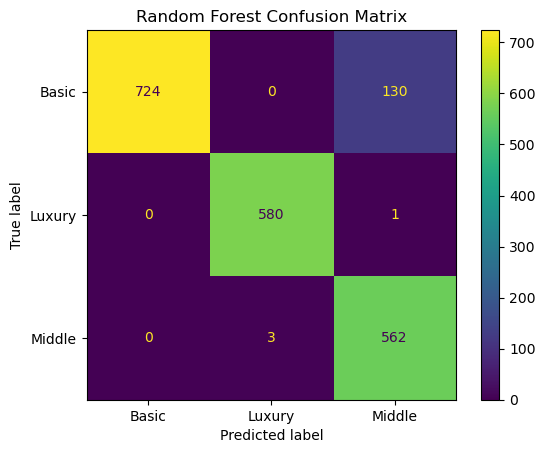

Classification report RF: 
               precision    recall  f1-score   support

       Basic       1.00      0.85      0.92       854
      Luxury       0.99      1.00      1.00       581
      Middle       0.81      0.99      0.89       565

    accuracy                           0.93      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.95      0.93      0.93      2000



In [26]:
#tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_RF.best_score_))
#tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_RF.best_estimator_.score(x_test_enc, y_test)))
#tampilkan best model dan best features
print("Best model:", GSCV_RF.best_estimator_)

mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()
print("Best features:", df_train_enc.columns[mask])

#buat prediksi dari test set
RF_pred = GSCV_RF.predict(x_test_enc)

import matplotlib.pyplot as plt
#buat confusion matrix
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)
#buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()

plt. title("Random Forest Confusion Matrix")
plt.show()
#tampilkan Classification report
print("Classification report RF: \n", classification_report(y_test, RF_pred))


In [27]:
#import Library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Buat rancangan pipeline mulai dari data scaling hingga classifier
pipe_LR_percentil = [('data_scaling', StandardScaler()),
                     ('feature_select', SelectPercentile()),
                     ('clf', LogisticRegression(random_state=84, class_weight='balanced', solver='liblinear'))]

# Buat parameter grid untuk step feature selection dan classifier
params_grid_LR_percentil = [{
                    'data_scaling': [StandardScaler()],
                    'feature_select': [SelectPercentile()],
                    'feature_select__percentile': np.arange(30, 51),
                    'clf__C': [0.01, 0.1, 1, 10],
                    'clf__penalty': ['l1', 'l2']
                    },
                {
                'data_scaling': [MinMaxScaler()],
                'feature_select': [SelectPercentile()],
                'feature_select__percentile': np.arange(30, 51),
                'clf__C': [0.01, 0.1, 1, 10],
                'clf__penalty': ['l1', 'l2']
                }]

# Definisikan StratifiedKFold
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=84)

# Muat tancangan pipeline ke dalam objek pipeline
estimator_LR = Pipeline(pipe_LR_percentil)

# Muat pipeline dan parameter grid ke dalam objek GSCV dengan Stratified 5-fold CV
GSCV_LR = GridSearchCV(estimator_LR, params_grid_LR_percentil, cv=SKF)

# Jalankan objek GSCV untuk melatih model dengan train set menggunakan fungsi fit
GSCV_LR.fit(x_train_enc, y_train)
print("GSCV training finished")


c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

GSCV training finished


c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV Score: 0.88025
Test Score: 0.8705
Best model: Pipeline(steps=[('data_scaling', StandardScaler()),
                ('feature_select', SelectPercentile(percentile=41)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                                    random_state=84, solver='liblinear'))])
Best features: Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'remainder__squaremeters', 'remainder__numberofrooms',
       'remainder__basement'],
      dtype='object')


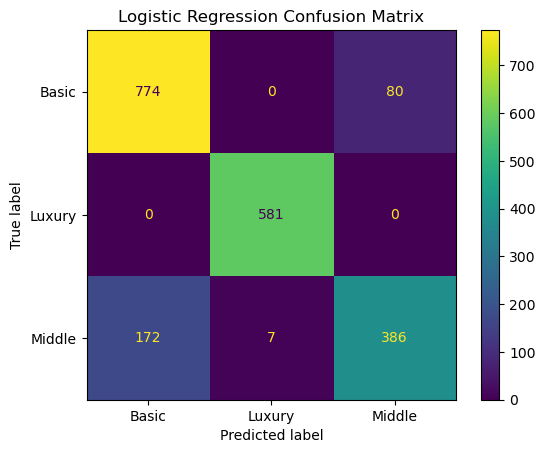

Classification report LR: 
               precision    recall  f1-score   support

       Basic       0.82      0.91      0.86       854
      Luxury       0.99      1.00      0.99       581
      Middle       0.83      0.68      0.75       565

    accuracy                           0.87      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [28]:
# tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_LR.best_score_))

# tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_LR.best_estimator_.score(x_test_enc, y_test)))

# tampilkan best model dan best features
print("Best model:", GSCV_LR.best_estimator_)

# Mendapatkan fitur terbaik berdasarkan seleksi fitur
mask = GSCV_LR.best_estimator_.named_steps['feature_select'].get_support()
print("Best features:", df_train_enc.columns[mask])

# buat prediksi dari test set
LR_pred = GSCV_LR.predict(x_test_enc)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# buat confusion matrix
cm = confusion_matrix(y_test, LR_pred, labels=GSCV_LR.classes_)

# buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR.classes_)
disp.plot()

plt.title("Logistic Regression Confusion Matrix")
plt.show()

# tampilkan Classification report
print("Classification report LR: \n", classification_report(y_test, LR_pred))


In [29]:
#import Library yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# buat rancangan pipeline mulai dari data scaling hingga classifier
pipe_LR = [
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', LogisticRegression(random_state=84, class_weight='balanced', solver='liblinear'))  # Menentukan solver
]

# buat parameter grid untuk step feature selection dan classifier
params_grid_LR = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.01, 0.1, 1, 10],  # Regularization strength
        'clf__penalty': ['l1', 'l2']   # Jenis penalty
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
]

# muat tancangan pipeline ke dalam objek pipeline
estimator_LR = Pipeline(pipe_LR)

# muat pipeline dan parameter grid ke dalam objek GSCV dengan Stratified 5-fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=84)
GSCV_LR = GridSearchCV(estimator_LR, params_grid_LR, cv=SKF)

# jalankan objek GSCV untuk melatih model dengan train set menggunakan fungsi fit
GSCV_LR.fit(x_train_enc, y_train)
print("GSCV training finished")


c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

GSCV training finished


c:\Users\capsl\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV Score: 0.882
Test Score: 0.8665
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=5)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                                    random_state=84, solver='liblinear'))])
Best features: Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'remainder__squaremeters'],
      dtype='object')


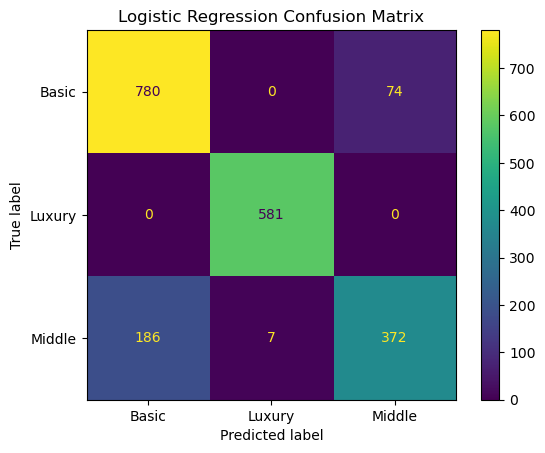

Classification report LR: 
               precision    recall  f1-score   support

       Basic       0.81      0.91      0.86       854
      Luxury       0.99      1.00      0.99       581
      Middle       0.83      0.66      0.74       565

    accuracy                           0.87      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.87      0.87      0.86      2000



In [31]:
# tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_LR.best_score_))

# tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_LR.best_estimator_.score(x_test_enc, y_test)))

# tampilkan best model dan best features
print("Best model:", GSCV_LR.best_estimator_)

# Mendapatkan fitur terbaik berdasarkan seleksi fitur
mask = GSCV_LR.best_estimator_.named_steps['feature select'].get_support()
print("Best features:", df_train_enc.columns[mask])

# buat prediksi dari test set
LR_pred = GSCV_LR.predict(x_test_enc)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# buat confusion matrix
cm = confusion_matrix(y_test, LR_pred, labels=GSCV_LR.classes_)

# buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR.classes_)
disp.plot()

plt.title("Logistic Regression Confusion Matrix")
plt.show()

# tampilkan Classification report
print("Classification report LR: \n", classification_report(y_test, LR_pred))
